## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

###1. Import and set and Tensorflow 2 and verify version

In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf
import numpy as np

In [74]:
print(tf.__version__)

2.1.0-rc1


### 2. Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

###3. Create a list 'class_names' of below Class Names
**Class - Class Name** ==> 
0 - T-shirt, 
1 - Trouser, 
2 - Pullover, 
3 - Dress, 
4 - Coat, 
5 - Sandal, 
6 - Shirt, 
7 - Sneaker, 
8 - Bag, 
9 - Ankle boot,

In [0]:
class_names=['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [77]:
print(class_names)

['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


###4. Find no.of samples in training and test dataset

In [78]:
x_train.shape[0]

60000

In [79]:
x_test.shape[0]

10000

###5. Find dimensions of an image in the dataset

In [80]:
x_train.shape[1:3]

(28, 28)

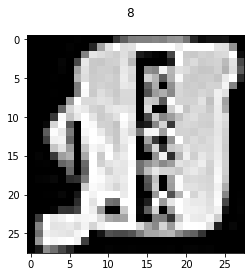

In [81]:
import matplotlib.pyplot as plt

img_num = np.random.randint(0,x_test.shape[0])
plt.imshow(x_test[img_num],cmap='gray')
plt.suptitle(str(y_test[img_num]))
plt.show()

### 6. Verify if existing labels/Classes are correct 

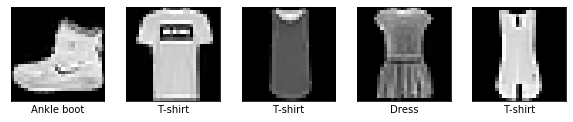

In [82]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()

### 7. Convert train and test labels to one hot vectors

** check `tensorflow.keras.utils.to_categorical()` **

In [0]:
y_train_enc = tf.keras.utils.to_categorical(y_train, num_classes=10)

In [0]:
y_test_enc = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [85]:
y_train_enc

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

###8. Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train_nor = x_train/255

In [0]:
x_test_nor = x_test/255

###9. Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras
check `tensorflow.keras.backend.expand_dims`


In [0]:
x_train_reshape=tf.keras.backend.expand_dims(x_train_nor,axis=-1).numpy()

In [89]:
x_train_reshape.shape[1:4]

(28, 28, 1)

In [0]:
x_test_reshape=tf.keras.backend.expand_dims(x_test_nor,axis=-1).numpy()

In [91]:
x_test_reshape.shape[1:4]

(28, 28, 1)

###10. Import the necessary layers from keras to build the model

In [0]:
tf.keras.backend.clear_session()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D

### 11. Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with no.of `epochs=10`. **

In [0]:
model = Sequential()

#Add first convolutional layer
model.add(Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add second convolutional layer
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))

#Flatten the output
model.add(Flatten())

#Dense layer
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [95]:
model.fit(x_train_reshape,y_train_enc,          
          validation_data=(x_test_reshape,y_test_enc),
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 158us/sample - loss: 0.3531 - accuracy: 0.8735 - val_loss: 0.2624 - val_accuracy: 0.9037
Epoch 2/10
60000/60000 [==============================] - 9s 150us/sample - loss: 0.2127 - accuracy: 0.9213 - val_loss: 0.2364 - val_accuracy: 0.9143
Epoch 3/10
60000/60000 [==============================] - 9s 152us/sample - loss: 0.1441 - accuracy: 0.9464 - val_loss: 0.2640 - val_accuracy: 0.9135
Epoch 4/10
60000/60000 [==============================] - 9s 152us/sample - loss: 0.0910 - accuracy: 0.9664 - val_loss: 0.2632 - val_accuracy: 0.9176
Epoch 5/10
60000/60000 [==============================] - 9s 150us/sample - loss: 0.0549 - accuracy: 0.9804 - val_loss: 0.3751 - val_accuracy: 0.9174
Epoch 6/10
60000/60000 [==============================] - 9s 151us/sample - loss: 0.0396 - accuracy: 0.9858 - val_loss: 0.3717 - val_accuracy: 0.9157
Epoch 7/10
60000/60000 [==========================

###12. Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
model1 = Sequential()

#Add first convolutional layer
model1.add(Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add second convolutional layer
model1.add(Conv2D(64, kernel_size=(3,3), activation='relu'))

#max Polling Layer
model1.add(MaxPool2D(pool_size=(2,2)))

#DropOut Layer
model1.add(tf.keras.layers.Dropout(0.25))

#Flatten the output
model1.add(Flatten())

#Dense layer
model1.add(Dense(128, activation='relu'))
model1.add(Dense(10, activation='softmax'))

In [0]:
model1.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [101]:
model1.fit(x_train_reshape,y_train_enc,          
          validation_data=(x_test_reshape,y_test_enc),
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 131us/sample - loss: 0.3813 - accuracy: 0.8631 - val_loss: 0.2958 - val_accuracy: 0.8885
Epoch 2/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.2463 - accuracy: 0.9089 - val_loss: 0.2450 - val_accuracy: 0.9106
Epoch 3/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.1972 - accuracy: 0.9276 - val_loss: 0.2242 - val_accuracy: 0.9201
Epoch 4/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.1591 - accuracy: 0.9407 - val_loss: 0.2228 - val_accuracy: 0.9206
Epoch 5/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.1315 - accuracy: 0.9516 - val_loss: 0.2528 - val_accuracy: 0.9168
Epoch 6/10
60000/60000 [==============================] - 7s 124us/sample - loss: 0.1073 - accuracy: 0.9593 - val_loss: 0.2639 - val_accuracy: 0.9159
Epoch 7/10
60000/60000 [==========================

###13. Verify accuracy of the model

> 

In [106]:
model1.evaluate(x_test_reshape,y_test_enc)

10000/10000 [==============================] - 1s 83us/sample - loss: 0.3137 - accuracy: 0.9216


[0.3136955557435751, 0.9216]

####14. Verify performance of your model selectively 

In [0]:
predictions = model1.predict(x_train_reshape)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color='blue')

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(9), class_names, rotation=90)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='blue')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

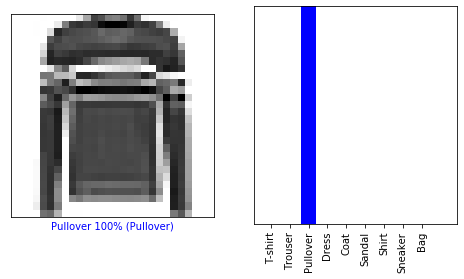

In [105]:
#Replace value of i with other index to check other product
i = 5
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_train, x_train)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_train)
plt.show()

### Now, to the above model, lets add Data Augmentation 

###15. Import the ImageDataGenrator from keras and fit the training images

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
datagen=ImageDataGenerator(width_shift_range=0.2, horizontal_flip=True, vertical_flip=True,rotation_range=5)

In [0]:
datagen.fit(x_train_reshape)

####16. Showing 5 versions of the first image in training dataset using image datagenerator.flow()

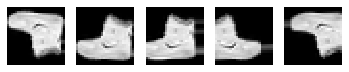

In [115]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train_reshape[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()